<a href="https://colab.research.google.com/github/syeadn2001/data_analytics_2/blob/main/Unit3_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unit 3 - Advanced Python - NumPy - Assignment #2

Given:

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv")

In [29]:
print(type(df))
print(df.size)
print(df.shape)
print(df.columns)
print(df.index)
print(df)


<class 'pandas.core.frame.DataFrame'>
2779
(397, 7)
Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')
RangeIndex(start=0, stop=397, step=1)
     Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0             1      Prof          B             19           18  Male  139750
1             2      Prof          B             20           16  Male  173200
2             3  AsstProf          B              4            3  Male   79750
3             4      Prof          B             45           39  Male  115000
4             5      Prof          B             40           41  Male  141500
..          ...       ...        ...            ...          ...   ...     ...
392         393      Prof          A             33           30  Male  103106
393         394      Prof          A             31           19  Male  150564
394         395      Prof          A             42           25  Male  10173

In [30]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


In [31]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [32]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [33]:
# Mean of all salaries
print(df['salary'].mean())

113706.45843828715


In [34]:
#Median of all salaries
print(df['salary'].median())

107300.0


***Median Salary Between Gender and/or Rank***

In [35]:
"""Making a new Data Frame that only has the columns 'sex' and 'salary'"""

sexSalaryDF = df[['sex','salary']]
print(sexSalaryDF)
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

"""Finding the Median salary for all males"""

maleSalsDF = sexSalaryDF[sexSalaryDF['sex']=='Male']
print("Male Salary Table")
print(maleSalsDF)
print("Median Salary for Males is:",maleSalsDF['salary'].median(),"\n")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

"""Finding the Median salary for all females"""
femaleSalDF = sexSalaryDF[sexSalaryDF['sex']=='Female']
print("Female Salary Table")
print(femaleSalDF.head(10))
print("Median Salary for Females is:",femaleSalDF['salary'].median())
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")


"""Comparing Mean Salary of Males and Females"""
meanDiff =  maleSalsDF['salary'].mean()-femaleSalDF['salary'].mean()
formatMeanDiff = "{:.2f}".format(meanDiff)
print("The difference between mean salaries of makes and females is: $",str(formatMeanDiff))




      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[397 rows x 2 columns]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Male Salary Table
      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[358 rows x 2 columns]
Median Salary for Males is: 108043.0 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Female Salary Table
       sex  salary
9   Female  129000
19  Female  137000
24  Female   74830
34  Female   80225
35  Female   77000
47  Female  151768
48  Female  140096
52  Female   74692
63  Female  103613
68  Female  111512
Median Salary for Females is: 103750.0
+++++++++++++++++++++++++++++++++++++++++++++++++++++

***Data Wrangling – perform some basic transformations on the data***

In [36]:
"""People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)"""
oldDF = df[df['yrs.service']>=20]
list1 = np.array(range(157))
#changing the index of the new data frame to properly index the data
oldDF.set_index(list1, inplace=True)
print(oldDF)
print("Mean Salary of 20+ experience: " + "${:.2f}".format(oldDF['salary'].mean()))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

"""Comparing the salaries of people who have 20+ years of experience 
vs less than 20 years of experience"""

youngDF = df[df['yrs.service']<20]
print(youngDF)
print("Mean Salary of <20 experience: " + "${:.2f}".format(youngDF['salary'].mean()))
print("The difference between people who have 20+ experiences vs those who" +
      "do not is: "+"${:2f}".format(oldDF['salary'].mean()-youngDF['salary'].mean()))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

"""People who have salary of greater than or equal to 200,000"""
richDF = df[df['salary']>=200000]
print(richDF)
print("The amount of people who have greater than $200000 is: ",str(richDF['salary'].count()))



     Unnamed: 0  rank discipline  yrs.since.phd  yrs.service   sex  salary
0             4  Prof          B             45           39  Male  115000
1             5  Prof          B             40           41  Male  141500
2             7  Prof          B             30           23  Male  175000
3             8  Prof          B             45           45  Male  147765
4             9  Prof          B             21           20  Male  119250
..          ...   ...        ...            ...          ...   ...     ...
152         385  Prof          A             27           21  Male  125192
153         387  Prof          A             29           27  Male  139219
154         389  Prof          A             38           36  Male  119450
155         393  Prof          A             33           30  Male  103106
156         395  Prof          A             42           25  Male  101738

[157 rows x 7 columns]
Mean Salary of 20+ experience: $122520.66
++++++++++++++++++++++++++++++++++

**My Findings**


As a result of my data wrangling, I discovered two intersting things. 

1. The male median and mean salary is significantly larger than their female counterparts. 
2. The mean salary of those who have 20+ years of experience compared to those
who have less is a significant margin, illustratin how experience plays a factor
in one's overall earnings from their respective professions. 

**Rename values, subset columns, etc**


In [37]:
"""REMOVED 'UNNAMED: 0' COLUMN """
del df['Unnamed: 0']
#df.drop(axis=1,columns='Unnamed: 0',inplace=True)


In [38]:
print(df)
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

"""RENAMED COLUMNS"""
print(df.rename(columns={"rank":"Profession","discipline":"Discipline","yrs.since.phd":"yrsSincePhD","yrs.service":"yrsOfService"},inplace=True))
print(df)
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

"""Subset Columns"""

salaryExperienceDF = df[['salary','yrsOfService']]
print(salaryExperienceDF.sort_values(by=['salary']))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

salaryUnder100_serviceYrs_DF= df[df['salary']<100000]
salaryUnder100_serviceYrs_DF = salaryUnder100_serviceYrs_DF[['yrsOfService','salary']]
print(salaryUnder100_serviceYrs_DF.sort_values(by=['yrsOfService']))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")




         rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male  139750
1        Prof          B             20           16  Male  173200
2    AsstProf          B              4            3  Male   79750
3        Prof          B             45           39  Male  115000
4        Prof          B             40           41  Male  141500
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

[397 rows x 6 columns]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
None
    Profession Discipline  yrsSincePhD  yrsOfService   sex  salary
0         Prof          B    

***Create some simple visualizations showing some simple statistics***

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f991fc63cd0>

Histogram for all numerical columns: 


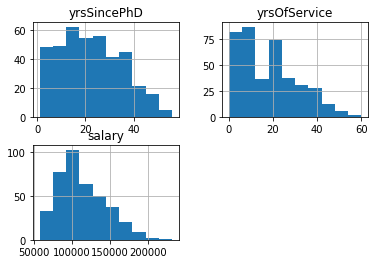

In [39]:
print(df.hist())
print()
print("Histogram for all numerical columns: ")

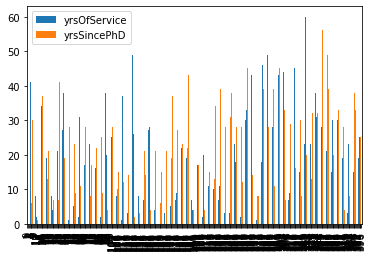

In [40]:
df[['yrsOfService','yrsSincePhD']].plot(kind='bar')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


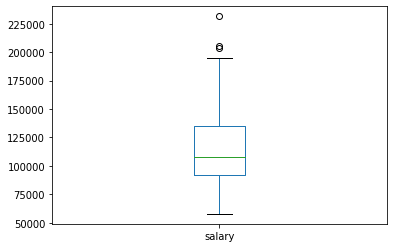

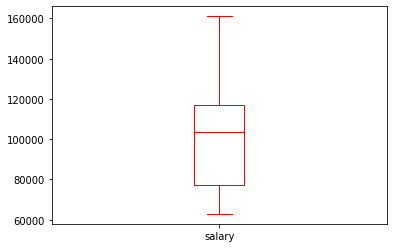

In [53]:
print(maleSalsDF.plot(kind='box'))
print(femaleSalDF.plot(kind='box',color='red'))

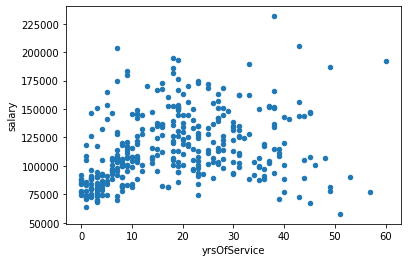

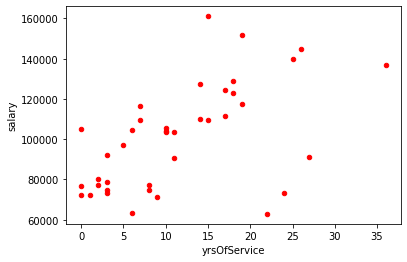

In [54]:
maleGenDF=df[df['sex']=="Male"]
femGenDF = df[df['sex']=="Female"]

maleGenDF.plot(kind='scatter', x = 'yrsOfService', y='salary')
femGenDF.plot(kind='scatter', x = 'yrsOfService', y='salary', color = 'red')

AxesSubplot(0.125,0.125;0.775x0.755)
Scatter plot of yrsOfService vs Salary


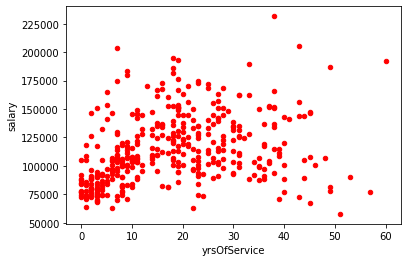

In [42]:
print(salaryExperienceDF.plot(kind='scatter',y='salary',x='yrsOfService',color='green'))
print("Scatter plot of yrsOfService vs Salary")

**Conclusions**

1. One interesting finding I discovered is the differences between male and female salaries. Based off the box-and-whisker plots, I discovered that males not only had a higher mean salary, but also that they had a higher ceiling in regards to their salary(peaking at 200,000). On the other hand, females not only earned less on average, they also had a lower ceiling . Yet as shown through my scatter plots distingushing males and females, the above conclusion may be affected by the fact that there were less female data points to consider and that the females in the study did not have as many years of experience as their male counterparts.

2. As shown through the last scatterplot, their seems to be a slight positive correlation between years of service and and individual's salary.